In this short post, I will outline how one can access data stored in a database like MariaDB or MySQL for analysis inside an Ipython Notebook.  There are many reasons why you might want to store your data in a proper database.  For me the most important are:

1. All of my data resides in a password protected and more secure place than having a multitude of csv, mat, and dta files scattered all over my file system. 

2. If you access the same data for multiple projects, any changes to the underlying data will be propagated to your analysis, without having to update copies of project data.

3. Having data in a central repository makes backup and recover significantly easier.

4. This allows for two-way interaction with your database.  You can read and write tables from/to your database. Rather than use SQL, you can create database tables using pandas/ipython.  

<!--TEASER_END-->

In what follows, I focus on techniques specifically for MariaDB and MySQL, although similar steps would work with other database products out there.

[Instructions for doing this in Stata](http://www.stata.com/support/faqs/data-management/using-plugin-to-connect-to-database/)

First, load the python libraries we'll need:

In [1]:
%matplotlib inline
import MySQLdb as mariadb
import getpass  # so we don't need to store passwords on disk
import pandas as pd

The following code uses the getpass package to record password information, and sets up the database connection to a mariadb/mysql database on localhost.  Once the connection is established, it runs the query 

``
select * from ipython_out
``

for copying the table `ipython_out` to the pandas dataframe `data`.  Note, you need to supply your own username (`myusername`) and database name (`dbname`).

In [3]:
# importing via mariadb directly into pandas dataframe:
password = getpass.getpass()  # asks for password in the console window so we don't store it here
conn = mariadb.connect('localhost','myusername',password,'dbname');
data = pd.io.sql.read_sql('select * from ipython_out', conn)
conn.close()
data.shape

(209594, 27)

As can be seen above, this table (now a dataframe in ipython) has over 200k rows and 27 columns.  Let's grab a list of columns:

In [7]:
data.columns.values

array(['year', 'donor', 'donor_iso2', 'donor_iso3', 'donor_project_id',
       'umbrella', 'recipient', 'recipient_iso2', 'recipient_iso3',
       'donor_type', 'bi_multi', 'environment',
       'environmental_impact_assessment', 'commitment_amount_usd_nominal',
       'commitment_amount_usd_constant', 'title', 'short_description',
       'long_description', 'aiddata_activity_name', 'aiddata_id',
       'score_title', 'score_short_description', 'score_long_description',
       'score_activity', 'score_purpose', 'coalesced_purpose_name',
       'total_score'], dtype=object)

In [8]:
data.head()

year                                              donor donor_iso2  \
0  1998  World Bank - International Finance Corporation...       None   
1  2001                      Asian Development Bank (ASDB)       None   
2  2005             Inter-American Development Bank (IADB)       None   
3  1988                      Asian Development Bank (ASDB)       None   
4  1994                      Asian Development Bank (ASDB)       None   

  donor_iso3 donor_project_id    umbrella          recipient recipient_iso2  \
0       None             None  WORLD BANK           Honduras             HN   
1       None             None        ASDB           Pakistan             PK   
2       None             None        IADB  America, regional                  
3       None             None        ASDB              China             CN   
4       None             None        ASDB               Laos             LA   

  recipient_iso3    donor_type     ...       \
0            HND  Multilateral     ...        
1            PAK  Multilateral     ...        
2                 Multilateral     ...        
3            CHN  Multilateral     ...        
4            LAO  Multilateral     ...        

                                    long_description  \
0                                               <br>   
1                                               None   
2  The aim of this operation is to improve the fi...   
3                                               None   
4                                               None   

                               aiddata_activity_name  aiddata_id  score_title  \
0  Electrical transmission/ distribution, activit...     3010916            1   
1  Systems of government|Improving public expendi...     2403576            0   
2  Agricultural services |Agricultural financial ...     2389476            1   
3                                Energy conservation     2445959            0   
4  Financial policy and administrative management...     2446645            0   

   score_short_description score_long_description score_activity  \
0                        0                      0              0   
1                        0                      0              1   
2                        0                      1              0   
3                        0                      0              0   
4                        0                      0              1   

  score_purpose                          coalesced_purpose_name  total_score  
0             0           Electrical transmission/ distribution            1  
1             1              Public sector financial management            2  
2             0                  Agricultural services, purpose            2  
3             1     Energy policy and administrative management            1  
4             1  Financial policy and administrative management            2  

[5 rows x 27 columns]

Of course, with the data in ipython, we can do lots of things like plotting:

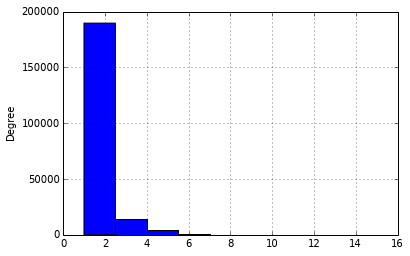

In [9]:
data.total_score.plot(kind='hist')